### **0. Set-up**

In [57]:
# Import libraries and utils
%run '../../utils.ipynb'

In [58]:
# Load NL predicted
raw_nl_pred = pd.read_csv("../../../data/gpt-3.5-turbo-0125/processed/nl/f8.csv")

In [59]:
# Load EN predicted
raw_en_pred = pd.read_csv("../../../data/gpt-3.5-turbo-0125/processed/en/f8.csv")

# Drop rows in EN SimLex that are missing in NL SimLex
raw_en_pred = raw_en_pred.drop(raw_en_pred[(raw_en_pred['word1'] == 'bad') & (raw_en_pred['word2'] == 'awful')].index)
raw_en_pred = raw_en_pred.drop(raw_en_pred[(raw_en_pred['word1'] == 'bad') & (raw_en_pred['word2'] == 'terrible')].index)

# Reset index
raw_en_pred = raw_en_pred.reset_index(drop=True)

In [60]:
# Show results
raw_nl_pred

,word1,word2,similarity_score_1,similarity_score_2,similarity_score_3,similarity_score_4,similarity_score_5,similarity_score_6,similarity_score_7,similarity_score_8,similarity_score_9,similarity_score_10,similarity_score_11,similarity_score_12,similarity_score_13,similarity_score_14,similarity_score_15
0,gelukkig,vrolijk,7.69,7.94,6.78,7.69,6.88,7.14,7.48,6.87,8.25,8.27,7.56,7.84,5.81,5.78,7.50
1,hard,stoer,4.31,6.04,5.30,5.08,5.43,6.00,6.05,3.75,4.04,7.36,6.38,6.12,4.23,5.04,7.50
2,snel,razendsnel,8.77,8.30,7.93,9.84,9.42,9.00,8.84,8.50,9.52,9.09,8.24,8.82,8.93,8.42,9.50
3,gelukkig,blij,6.62,7.43,7.81,6.73,8.43,7.14,8.02,6.07,8.68,7.64,7.16,6.76,8.68,7.73,8.50
4,kort,lang,2.31,4.32,4.98,5.22,2.38,3.13,4.47,3.80,2.08,4.09,0.24,5.18,5.72,3.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,samenvoegen,verwerven,2.22,0.00,4.94,0.68,2.84,1.08,1.10,1.50,0.99,3.02,0.00,0.00,2.01,2.34,2.34
990,sturen,bijwonen,0.06,0.00,0.47,0.07,0.57,1.08,1.08,1.14,0.00,1.40,0.00,0.00,0.78,0.65,0.22
991,verzamelen,bijwonen,0.66,0.00,0.74,0.03,0.64,1.08,1.08,1.22,4.07,2.22,0.00,0.00,2.12,1.78,1.16
992,opnemen,intrekken,1.52,1.43,1.98,0.42,0.35,1.08,1.09,1.42,1.22,1.79,0.00,0.00,1.56,0.12,1.86


In [61]:
# Show results
raw_en_pred

,word1,word2,similarity_score_1,similarity_score_2,similarity_score_3,similarity_score_4,similarity_score_5,similarity_score_6,similarity_score_7,similarity_score_8,similarity_score_9,similarity_score_10,similarity_score_11,similarity_score_12,similarity_score_13,similarity_score_14,similarity_score_15
0,happy,cheerful,8.75,9.20,7.76,5.26,9.50,9.60,8.66,8.50,9.15,8.57,8.90,8.20,9.80,8.90,8.89
1,hard,easy,4.10,1.73,0.81,3.00,1.67,3.50,4.52,1.14,1.98,2.14,5.65,3.20,6.00,2.33,5.00
2,fast,rapid,9.50,9.60,9.34,9.75,9.80,8.50,9.68,9.21,8.90,9.29,9.50,9.80,9.70,8.20,9.17
3,happy,glad,8.50,8.60,8.47,7.50,9.40,8.80,7.90,8.09,8.00,8.57,7.80,7.60,9.70,8.50,8.89
4,short,long,7.25,7.50,0.71,5.50,9.60,5.50,6.42,7.80,7.34,8.57,8.20,8.80,9.20,7.50,6.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,join,acquire,7.35,6.60,4.00,3.00,5.12,0.25,6.27,4.38,6.23,6.12,3.93,4.30,3.44,4.00,4.00
990,send,attend,5.30,6.60,2.40,1.00,3.44,0.25,4.44,3.33,4.28,4.65,4.44,4.35,2.09,2.17,3.00
991,gather,attend,6.97,6.00,3.00,1.00,4.20,0.25,5.36,3.33,4.56,4.94,4.21,3.90,2.53,3.52,2.50
992,absorb,withdraw,3.41,3.20,1.80,1.00,2.60,0.25,3.37,2.08,2.67,3.12,2.19,3.40,1.36,5.75,3.00


### **1. Data Processing**

In [62]:
# Copy dataframe
nl_pred = raw_nl_pred.copy()

# List of columns to calculate mean SimLex-999
similarity_cols = [f"similarity_score_{i}" for i in range(1, 16)]

# Calculate the mean SimLex-999
nl_pred['nl_pred_sl'] = nl_pred[similarity_cols].mean(axis=1).round(2)

# Calculate the standard deviation SimLex-999
nl_pred['nl_pred_sd'] = nl_pred[similarity_cols].std(axis=1).round(2)

# Select columns
nl_pred = nl_pred[['word1', 'word2', 'nl_pred_sl', 'nl_pred_sd']]

# Show results
nl_pred

,word1,word2,nl_pred_sl,nl_pred_sd
0,gelukkig,vrolijk,7.30,0.76
1,hard,stoer,5.51,1.14
2,snel,razendsnel,8.87,0.54
3,gelukkig,blij,7.56,0.81
4,kort,lang,3.66,1.48
...,...,...,...,...
989,samenvoegen,verwerven,1.67,1.36
990,sturen,bijwonen,0.50,0.50
991,verzamelen,bijwonen,1.12,1.10
992,opnemen,intrekken,1.06,0.70


In [63]:
# Copy dataframe
en_pred = raw_en_pred.copy()

# List of columns to calculate mean SimLex-999
similarity_cols = [f"similarity_score_{i}" for i in range(1, 16)]

# Calculate the mean SimLex-999
en_pred['en_pred_sl'] = en_pred[similarity_cols].mean(axis=1).round(2)

# Calculate the standard deviation SimLex-999
en_pred['en_pred_sd'] = en_pred[similarity_cols].std(axis=1).round(2)

# Select columns
en_pred = en_pred[['word1', 'word2', 'en_pred_sl', 'en_pred_sd']]

# Show results
en_pred

,word1,word2,en_pred_sl,en_pred_sd
0,happy,cheerful,8.64,1.08
1,hard,easy,3.12,1.64
2,fast,rapid,9.33,0.48
3,happy,glad,8.42,0.63
4,short,long,7.08,2.15
...,...,...,...,...
989,join,acquire,4.60,1.77
990,send,attend,3.45,1.68
991,gather,attend,3.75,1.78
992,absorb,withdraw,2.61,1.29


In [64]:
# Concatenate NL and EN DataFrames
conc = pd.concat([nl_pred, en_pred], axis=1)

# Show results
conc

,word1,word2,nl_pred_sl,nl_pred_sd,word1,word2,en_pred_sl,en_pred_sd
0,gelukkig,vrolijk,7.30,0.76,happy,cheerful,8.64,1.08
1,hard,stoer,5.51,1.14,hard,easy,3.12,1.64
2,snel,razendsnel,8.87,0.54,fast,rapid,9.33,0.48
3,gelukkig,blij,7.56,0.81,happy,glad,8.42,0.63
4,kort,lang,3.66,1.48,short,long,7.08,2.15
...,...,...,...,...,...,...,...,...
989,samenvoegen,verwerven,1.67,1.36,join,acquire,4.60,1.77
990,sturen,bijwonen,0.50,0.50,send,attend,3.45,1.68
991,verzamelen,bijwonen,1.12,1.10,gather,attend,3.75,1.78
992,opnemen,intrekken,1.06,0.70,absorb,withdraw,2.61,1.29


### **2. Descriptive Statistics**

In [65]:
# Summary statistics SimLex-999
nl_pred_sl_summary = round(nl_pred['nl_pred_sl'].describe(), 2)
en_pred_sl_summary = round(en_pred['en_pred_sl'].describe(), 2)

# Add median SimLex-999
nl_pred_sl_summary['median'] = round(nl_pred['nl_pred_sl'].median(), 2)
en_pred_sl_summary['median'] = round(en_pred['en_pred_sl'].median(), 2)

# Summary statistics standard deviations
nl_pred_sd_summary = round(nl_pred['nl_pred_sd'].describe(), 2)
en_pred_sd_summary = round(en_pred['en_pred_sd'].describe(), 2)

# Add median standard deviation
nl_pred_sd_summary['median'] = round(nl_pred['nl_pred_sd'].median(), 2)
en_pred_sd_summary['median'] = round(en_pred['en_pred_sd'].median(), 2)

# Create pandas DataFrame
summary_df = pd.DataFrame({
    "nl_pred_sl": nl_pred_sl_summary,
    "en_pred_sl": en_pred_sl_summary,
    "nl_pred_sd": nl_pred_sd_summary,
    "en_pred_sd": en_pred_sd_summary
})

# Show results
summary_df

,nl_pred_sl,en_pred_sl,nl_pred_sd,en_pred_sd
count,994.00,994.00,994.00,994.00
mean,4.07,4.76,1.14,1.45
std,2.21,2.12,0.41,0.59
min,0.05,0.01,0.10,0.04
25%,2.31,3.13,0.84,1.06
50%,3.87,4.80,1.12,1.43
75%,5.92,6.47,1.40,1.76
max,9.02,9.42,2.66,3.43
median,3.87,4.80,1.12,1.43


#### **2.1. SimLex-999**

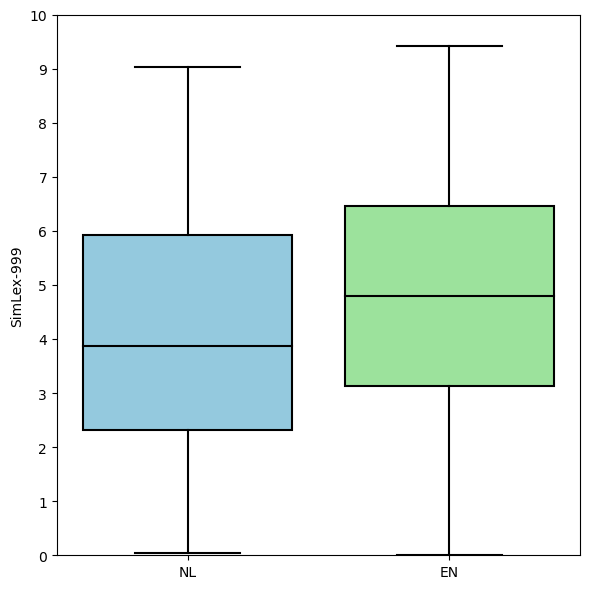

In [66]:
# Rename columns and copy
renamed_nl_pred_sl = nl_pred.rename(columns={"nl_pred_sl": "SimLex-999"}).copy()
renamed_en_pred_sl = en_pred.rename(columns={"en_pred_sl": "SimLex-999"}).copy()

# Create dummy label
renamed_nl_pred_sl['Score'] = 'NL'
renamed_en_pred_sl['Score'] = 'EN'

# Combine DataFrames
combined_data = pd.concat([renamed_nl_pred_sl, renamed_en_pred_sl])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='SimLex-999',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('SimLex-999')
# plt.title('Comparison of SimLex-999')

# Customize y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 10)  # Setting y-axis limits from 0 to 10

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

#### **2.2. Standard Deviation**

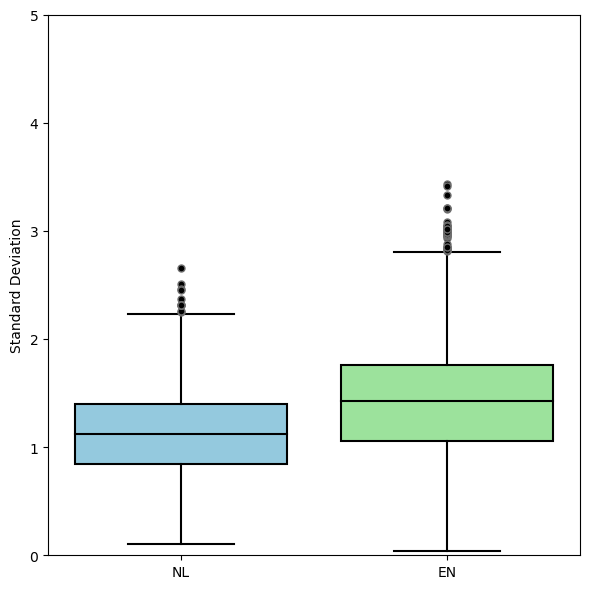

In [67]:
# Rename columns and copy
renamed_nl_pred_sd = nl_pred.rename(columns={"nl_pred_sd": "Standard Deviation"}).copy()
renamed_en_pred_sd = en_pred.rename(columns={"en_pred_sd": "Standard Deviation"}).copy()

# Create dummy label
renamed_nl_pred_sd['Score'] = 'NL'
renamed_en_pred_sd['Score'] = 'EN'

# Combine DataFrames
combined_data = pd.concat([renamed_nl_pred_sd, renamed_en_pred_sd])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='Standard Deviation',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('Standard Deviation')
# plt.title('Comparison of Standard Deviation')

# Customizing y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 5)  # Setting y-axis limits from 0 to 5

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **3. Distributions**

#### **3.1. SimLex-999**

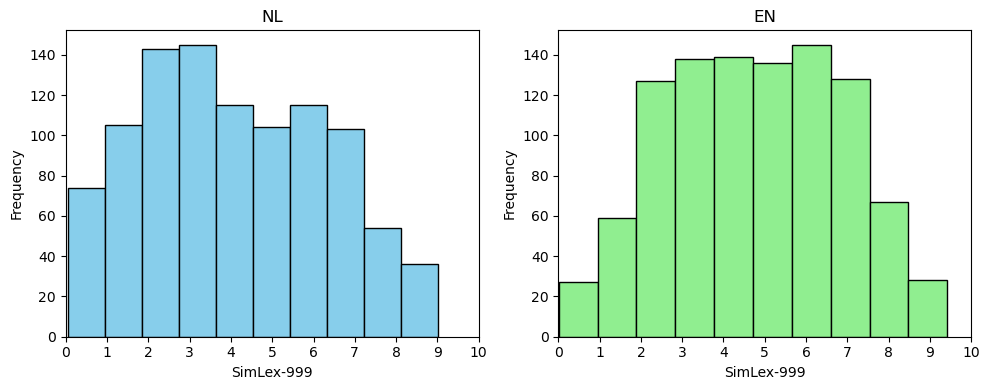

In [68]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 10

# Define bins
bins = 10

# Plot NL predicted histogram
axes[0].hist(renamed_nl_pred_sl['SimLex-999'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('NL')
axes[0].set_xlabel('SimLex-999')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot EN predicted histogram
axes[1].hist(renamed_en_pred_sl['SimLex-999'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('EN')
axes[1].set_xlabel('SimLex-999')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

#### **3.2. Standard Deviation**

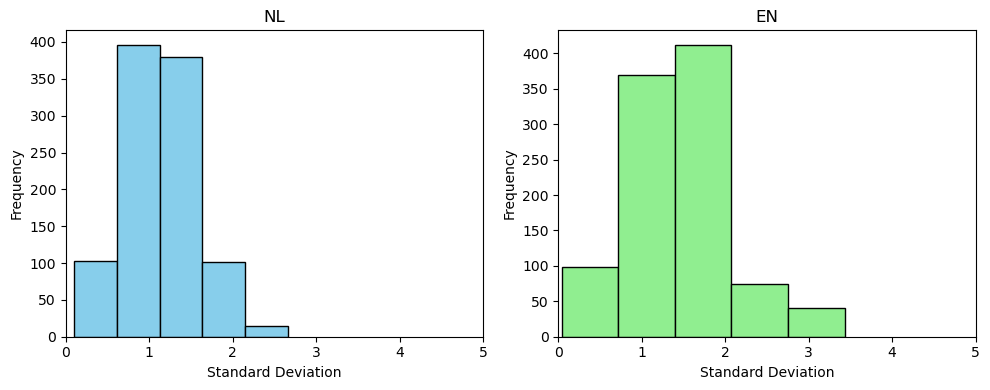

In [69]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 5

# Define bins
bins = 5

# Plot NL predicted histogram
axes[0].hist(renamed_nl_pred_sd['Standard Deviation'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('NL')
axes[0].set_xlabel('Standard Deviation')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot EN predicted histogram
axes[1].hist(renamed_en_pred_sd['Standard Deviation'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('EN')
axes[1].set_xlabel('Standard Deviation')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **4. Outliers**

#### **4.1. NL**

In [70]:
# Count outliers
print_outlier_counts(nl_pred)

Outliers in nl_pred_sd: 11
No outliers found in columns: nl_pred_sl


In [71]:
# Row outliers
print_outlier_data(nl_pred, 'nl_pred_sd')


Outliers in nl_pred_sd:
            word1        word2  nl_pred_sl  nl_pred_sd
177     werkgever    werknemer        5.42        2.25
186         steak        vlees        6.15        2.37
298        heldin         held        7.02        2.26
355         tante         neef        3.87        2.31
437  tegenstander       rivaal        6.95        2.31
439       monster        demon        5.95        2.51
444        straal  zonneschijn        5.76        2.46
449   appartement      meubels        3.96        2.31
492         wagen      rijtuig        6.35        2.45
746       formule    logaritme        4.19        2.66
835     deelnemen      meedoen        7.37        2.31


#### **4.2. EN**

In [72]:
# Count outliers
print_outlier_counts(en_pred)

Outliers in en_pred_sd: 35
No outliers found in columns: en_pred_sl


In [73]:
# Row outliers
print_outlier_data(en_pred, 'en_pred_sd')


Outliers in en_pred_sd:
          word1       word2  en_pred_sl  en_pred_sd
106        wife     husband        6.83        3.08
108       groom       bride        6.08        3.43
110       south       north        6.68        2.95
112       uncle        aunt        7.12        3.04
113       horse        mare        5.67        2.93
114      bottom         top        7.11        3.01
115      friend       buddy        7.44        2.95
116     student       pupil        7.27        2.96
118         leg         arm        6.21        2.81
120       woman         man        7.61        3.04
122     actress       actor        7.82        3.05
123     teacher  instructor        6.77        2.85
124       movie        film        7.05        2.98
133      sunset     sunrise        5.99        3.02
135         cow      cattle        5.90        2.82
142     disease   infection        4.67        2.83
145        lady   gentleman        6.84        3.33
147      priest        monk        6.15

#### **4.3. Add to Summary**

In [74]:
# Calculate outliers
outliers_nl_pred_sl = calculate_outliers(nl_pred, 'nl_pred_sl')
outliers_nl_pred_sd = calculate_outliers(nl_pred, 'nl_pred_sd')
outliers_en_pred_sl = calculate_outliers(en_pred, 'en_pred_sl')
outliers_en_pred_sd = calculate_outliers(en_pred, 'en_pred_sd')

# Count outliers
count_outliers_nl_pred_sl = outliers_nl_pred_sl.shape[0]
count_outliers_nl_pred_sd = outliers_nl_pred_sd.shape[0]
count_outliers_en_pred_sl = outliers_en_pred_sl.shape[0]
count_outliers_en_pred_sd = outliers_en_pred_sd.shape[0]

# Add outliers count to summary
outliers_row = pd.Series([count_outliers_nl_pred_sl, count_outliers_en_pred_sl, count_outliers_nl_pred_sd, count_outliers_en_pred_sd], 
    index=summary_df.columns,
    name='outliers'
)
summary_df = pd.concat([summary_df, outliers_row.to_frame().T])

# Show results
summary_df

,nl_pred_sl,en_pred_sl,nl_pred_sd,en_pred_sd
count,994.00,994.00,994.00,994.00
mean,4.07,4.76,1.14,1.45
std,2.21,2.12,0.41,0.59
min,0.05,0.01,0.10,0.04
25%,2.31,3.13,0.84,1.06
50%,3.87,4.80,1.12,1.43
75%,5.92,6.47,1.40,1.76
max,9.02,9.42,2.66,3.43
median,3.87,4.80,1.12,1.43
outliers,0.00,0.00,11.00,35.00


### **5. Correlation**

#### **5.1. SimLex-999 vs Standard Deviation**

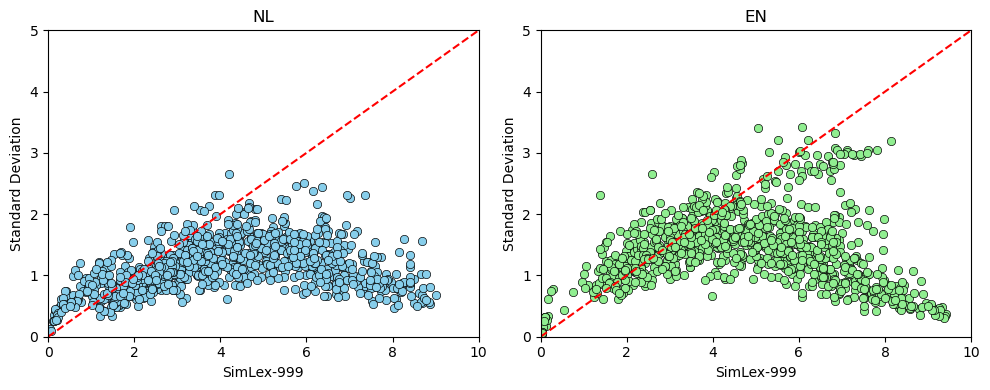

In [75]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 10
y_min = 0
y_max = 5

# Create scatter plot
sns.scatterplot(x='nl_pred_sl', y='nl_pred_sd', data=nl_pred, ax=axes[0], color='skyblue', edgecolor='black')

# Plot diagonal line
axes[0].plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')

# Set axis limits
axes[0].set_xlim(x_min, x_max)
axes[0].set_ylim(y_min, y_max)

# Set labels and title
axes[0].set_xlabel('SimLex-999')
axes[0].set_ylabel('Standard Deviation')
axes[0].set_title('NL')

# Remove grid
axes[0].grid(False)

# Create scatter plot
sns.scatterplot(x='en_pred_sl', y='en_pred_sd', data=en_pred, ax=axes[1], color='lightgreen', edgecolor='black')

# Plot diagonal line
axes[1].plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')

# Set axis limits
axes[1].set_xlim(x_min, x_max)
axes[1].set_ylim(y_min, y_max)

# Set labels and title
axes[1].set_xlabel('SimLex-999')
axes[1].set_ylabel('Standard Deviation')
axes[1].set_title('EN')

# Remove grid
axes[1].grid(False)

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

In [76]:
# List to store correlations
correlations_list = []

# Append correlations to list
correlations_list.append(calculate_correlation_and_pvalue(conc, 'nl_pred_sl', 'nl_pred_sd'))
correlations_list.append(calculate_correlation_and_pvalue(conc, 'en_pred_sl', 'en_pred_sd'))

# Convert list into Pandas DataFrame
correlation_df = pd.DataFrame(correlations_list)

# Show results
correlation_df

,simlex999,standard_deviation,correlation,p_value,significance
0,nl_pred_sl,nl_pred_sd,0.39812,4.239470e-39,significant
1,en_pred_sl,en_pred_sd,-0.04534,1.531600e-01,not significant


### **6. Evaluation Metrics**

#### **6.1. Spearmans's Rank Correlation**

##### **6.1.1. NL SimLex-999 vs EN SimLex-999**

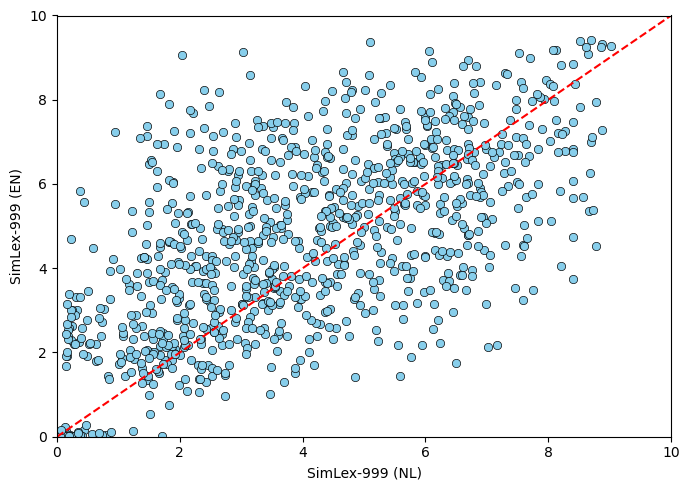

In [77]:
# Scatter plot
plot_scatter_plot(conc, 'nl_pred_sl', 'en_pred_sl', 'SimLex-999 (NL)', 'SimLex-999 (EN)', 0, 10, 0, 10)

In [78]:
# Correlation and pvalue
print_correlation_and_pvalue(conc, 'nl_pred_sl', 'en_pred_sl')

Spearman's Rank correlation: 0.58527
P-value: 1.9955486068906647e-92
The correlation is statistically significant.



##### **6.1.2. NL Standard Deviation vs EN Standard Deviation**

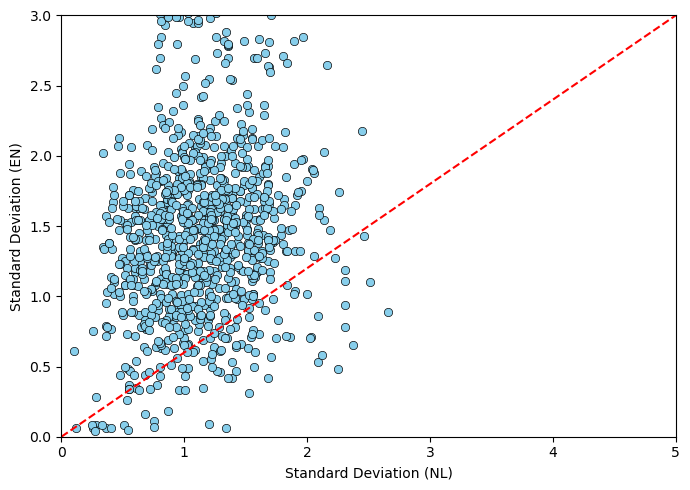

In [79]:
# Scatter plot
plot_scatter_plot(conc, 'nl_pred_sd', 'en_pred_sd', 'Standard Deviation (NL)', 'Standard Deviation (EN)', 0, 5, 0, 3)

In [80]:
# Correlation and p-value
print_correlation_and_pvalue(conc, 'nl_pred_sd', 'en_pred_sd')

Spearman's Rank correlation: 0.18759
P-value: 2.5243786601208326e-09
The correlation is statistically significant.



#### **7.2. Mean Square Error (MSE)**

In [81]:
# Calculate Mean Squared Error
mse = mean_squared_error(conc['nl_pred_sl'], conc['en_pred_sl'])

# Show results
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 4.25


#### **7.3. Mean Absolute Error (MAE)**

In [82]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(conc['nl_pred_sl'], conc['en_pred_sl'])

# Show results
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 1.60


#### **7.4. Bland-Altman**

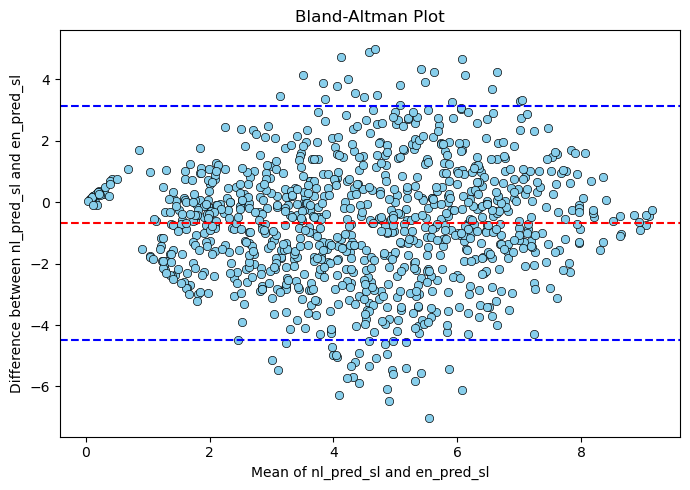

In [83]:
# SimLex-999
bland_altman_plot(data1=conc['nl_pred_sl'], data2=conc['en_pred_sl'])

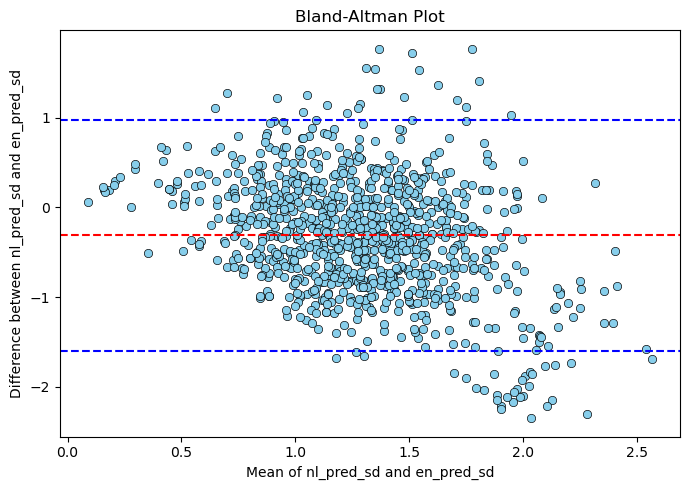

In [84]:
# Standard Deviation
bland_altman_plot(data1=conc['nl_pred_sd'], data2=conc['en_pred_sd'])